This BRATS Slice Direction Model is based on Laurence Moroney (2021) Rock Paper Scissors Classification Model. Available at: https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb
[Last Accessed 30 June 2021]

In [ ]:
# upload dataset here (deprecated for full dataset- using google drive mounting method)
# from google.colab import files
# datasetfile = files.upload()

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import nibabel and os module for image formatting and file management
import nibabel as nib
import os

from scipy import ndimage

# lists to store slices
sagittalList = []
coronalList = []
axialList = []

# place slices into lists
def store_img(file):
  bratsImg = nib.load(file)
  bratsImgData = bratsImg.get_fdata()

  i = 100
  while i < 130:
    # rotate images to 0 degrees + store in lists
    rotatedImg = ndimage.rotate(bratsImgData[i,:,:], 90, mode = 'mirror')
    sagittalList.append(rotatedImg.copy())

    rotatedImg = ndimage.rotate(bratsImgData[:,i,:], 90, mode = 'mirror')
    coronalList.append(rotatedImg.copy())

    rotatedImg = ndimage.rotate(bratsImgData[:,:,i], 90, mode = 'mirror')
    axialList.append(rotatedImg.copy())

    i += 1

count = 0
# extract flair files from BRATS HGG + LGG data folders
dirHGG = '/content/drive/MyDrive/URVOS/Brats_2018_data.zip (Unzipped Files)/Brats_2018 data/HGG/'
for folder in os.listdir(dirHGG):
  for file in os.listdir(dirHGG + folder + '/'):
    if count < 30:
      if file.endswith("flair.nii.gz"):
        store_img(dirHGG + folder + '/' + file)
        count +=1

count = 0
dirLGG = '/content/drive/MyDrive/URVOS/Brats_2018_data.zip (Unzipped Files)/Brats_2018 data/LGG/'
for folder in os.listdir(dirLGG):
  for file in os.listdir(dirLGG + folder + '/'):
    if count < 30:
      if file.endswith("flair.nii.gz"):
        store_img(dirLGG + folder + '/' + file)
        count += 1

# store_img('/content/drive/MyDrive/URVOS/Brats_2018_data.zip (Unzipped Files)/Brats_2018 data/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii.gz')

Total images: 5400

Sagittal Images:


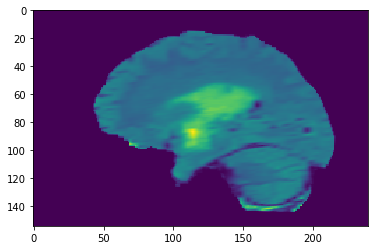

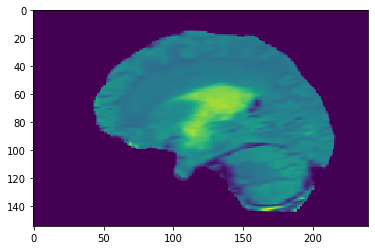

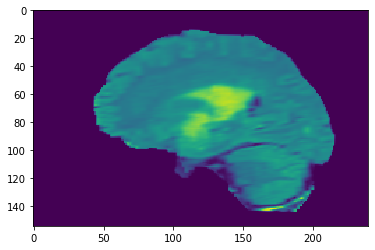

Coronal Images:


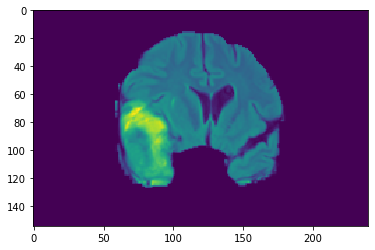

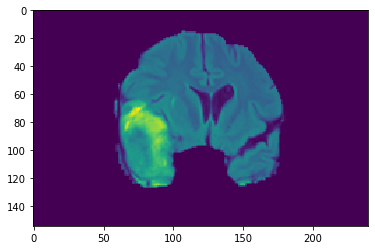

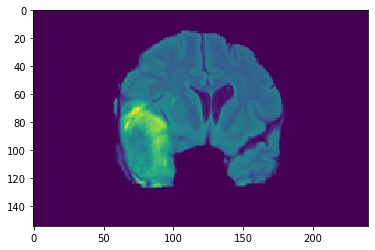

Axial Images:


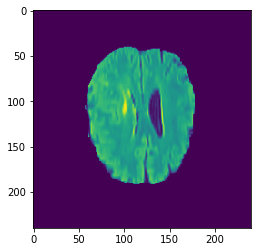

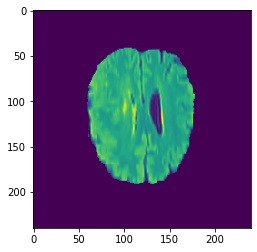

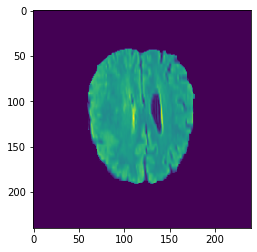

In [ ]:
%matplotlib inline 
from matplotlib import pyplot as plt

# show first 3 images in image lists
print("Total images: " + str(len(sagittalList) + len(coronalList) + len(axialList)) + "\n")

def show_imgs(sliceList):
  for i in range(3):
    plt.imshow(sliceList[i], interpolation='nearest')
    plt.show()

print("Sagittal Images:")
show_imgs(sagittalList)

print("Coronal Images:")
show_imgs(coronalList)

print("Axial Images:")
show_imgs(axialList)

In [ ]:
mainDir = '/content/gdrive/bratsClassification'

# create 3 classes (sagittal, coronal, axial)
trainClasses = ['sagittal', 'coronal', 'axial']
testClasses = ['testSagittal', 'testCoronal', 'testAxial']
# out of sample
oosClasses = ['oosSagittal', 'oosCoronal', 'oosAxial']

# training directories
for trainClass in trainClasses:
  if not os.path.exists(mainDir + '/train/' + trainClass):
    os.makedirs(mainDir + '/train/' + trainClass)

# validation directories
for testClass in testClasses:
  if not os.path.exists(mainDir + '/test/' + testClass):
    os.makedirs(mainDir + '/test/' + testClass)

# out of sample test directory
for oosClass in oosClasses:
  if not os.path.exists(mainDir + '/oos/' + oosClass):
    os.makedirs(mainDir + '/oos/' + oosClass)


In [ ]:
# assigning directory path
myPath = os.path.abspath(mainDir)

# copying to directories
def list_to_dir(sliceType, sliceList):
  count = 1
  for slices in sliceList:
    listLength = len(sliceList)
    if count <= (listLength * 0.7): 
      # add to train
      plt.imsave(myPath + '/train/' + sliceType + '/' + sliceType[0:3] + 'Slice' + str(count) + '.png', slices)
    elif count <= (listLength * 0.9): 
      # add to test
      plt.imsave(myPath + '/test/test' + sliceType.capitalize() + '/test' + sliceType[0:3].capitalize() + 'Slice' + str(count) + '.png', slices)
    else: 
      # else add to out of sample
      plt.imsave(myPath + '/oos/oos' + sliceType.capitalize() + '/oos' + sliceType[0:3].capitalize() + 'Slice' + str(count) + '.png', slices)

    count+=1

list_to_dir("sagittal", sagittalList)
list_to_dir("coronal", coronalList)
list_to_dir("axial", axialList)

In [ ]:
#Counting images in folders
print("Number of Out of Sample Test class images")
print(len(os.listdir('/content/gdrive/bratsClassification/oos/oosAxial')))
print(len(os.listdir('/content/gdrive/bratsClassification/oos/oosSagittal')))
print(len(os.listdir('/content/gdrive/bratsClassification/oos/oosCoronal')))
tOos = len(os.listdir('/content/gdrive/bratsClassification/oos/oosAxial')) + len(os.listdir('/content/gdrive/bratsClassification/oos/oosSagittal')) + len(os.listdir('/content/gdrive/bratsClassification/oos/oosCoronal'))
print("Total out-of-sample images:"+ str(tOos) + '\n')

print("Number of Test class images")
print(len(os.listdir('/content/gdrive/bratsClassification/test/testAxial')))
print(len(os.listdir('/content/gdrive/bratsClassification/test/testSagittal')))
print(len(os.listdir('/content/gdrive/bratsClassification/test/testCoronal')))
tTest = len(os.listdir('/content/gdrive/bratsClassification/test/testAxial')) + len(os.listdir('/content/gdrive/bratsClassification/test/testSagittal')) + len(os.listdir('/content/gdrive/bratsClassification/test/testCoronal'))
print("Total test images:"+ str(tTest) + '\n')
testNo = int(tTest)

print("Number of Training class images")
print(len(os.listdir('/content/gdrive/bratsClassification/train/axial')))
print(len(os.listdir('/content/gdrive/bratsClassification/train/coronal')))
print(len(os.listdir('/content/gdrive/bratsClassification/train/sagittal')))
tTrain = len(os.listdir('/content/gdrive/bratsClassification/train/axial')) + len(os.listdir('/content/gdrive/bratsClassification/train/coronal')) + len(os.listdir('/content/gdrive/bratsClassification/train/sagittal'))
print("Total train images:"+ str(tTrain) + '\n')
trainNo = int(tTrain)

Number of Out of Sample Test class images
180
180
180
Total out-of-sample images:540

Number of Test class images
360
360
360
Total test images:1080

Number of Training class images
1260
1260
1260
Total train images:3780



In [ ]:
#callback for 98% accuracy
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

tBatchSize = 30
vBatchSize = 30
#Define imageDataGenerators and Model
TRAINING_DIR = '/content/gdrive/bratsClassification/train/'
training_datagen = ImageDataGenerator(
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
)

VALIDATION_DIR = "/content/gdrive/bratsClassification/test/"
validation_datagen=ImageDataGenerator()#rescale=1./240

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(240,240),
    class_mode='categorical',
    batch_size=tBatchSize
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(240,240),
    class_mode='categorical',
    batch_size=vBatchSize
)

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics='acc')

Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
______________________________________

In [ ]:
#Train model
history = model.fit(train_generator,
                    epochs=30,
                    steps_per_epoch=(trainNo/tBatchSize),
                    validation_data=validation_generator,
                    verbose = 1,
                    validation_steps=(testNo/vBatchSize),
                    callbacks=[callbacks])

model.save("bratsDirectionalClassification.h5")

Epoch 1/30
126/126 [==============================] - 85s 417ms/step - loss: 30.0689 - acc: 0.3690 - val_loss: 1.0987 - val_acc: 0.3333
Epoch 2/30
126/126 [==============================] - 56s 443ms/step - loss: 1.0989 - acc: 0.3262 - val_loss: 1.0986 - val_acc: 0.3343
Epoch 3/30
126/126 [==============================] - 53s 422ms/step - loss: 2.1552 - acc: 0.6034 - val_loss: 0.0716 - val_acc: 0.9796
Epoch 4/30
126/126 [==============================] - 53s 420ms/step - loss: 0.3156 - acc: 0.9307 - val_loss: 0.1359 - val_acc: 0.9444

Reached 90% accuracy so cancelling training!


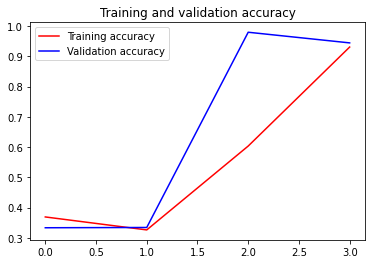

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

{0: 'axial', 1: 'coronal', 2: 'sagittal'}
Predictions: ['sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagitta

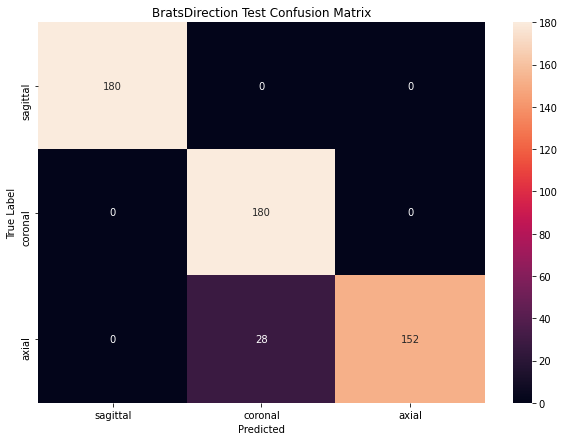

In [ ]:
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

classesDict = {v: k for k, v in train_generator.class_indices.items()} #shows values of classes as a dictionary,flipped such that {angle:index}
#Testing Out of Sample directory Images by PATH

directionTruth = [] #holds real values of the direction
directionPrediction = [] #holds values of predictions
folder_path = '/content/gdrive/bratsClassification/oos/oos'

def predictArray(folder_path,direction):
  folder_path += direction
  for img in os.listdir(folder_path):
      img = os.path.join(folder_path, img)
      img = image.load_img(img, target_size=(240, 240))
      img = image.img_to_array(img)
      img = np.expand_dims(img, axis=0)
      
      directionTruth.append(direction.lower())
      images = np.vstack([img])
      classes = model.predict(images, batch_size=1)
      #print("\n(sagittal / coronal / axial)")
      classes = np.transpose(classes)
      classes = classes.reshape((3,))#turns to 1d array of predictions
      classes = np.argmax(classes)#gets most possible class
      classes = classesDict.get(classes)#get direction from index
      directionPrediction.append(classes)#adds to prediction array


print(classesDict)
predictArray(folder_path,'Sagittal')
predictArray(folder_path,'Coronal')
predictArray(folder_path,'Axial')
print("Predictions:",directionPrediction) # array of predicted classes
print("Actual Direction:",directionTruth) # array of truths, made from repeatedly adding chosen direction to an array

#confusion matrix
labels = ["sagittal", "coronal", "axial"]
the_matrix = confusion_matrix(directionTruth, directionPrediction, labels=labels)
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = labels, columns = labels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title('BratsDirection Test Confusion Matrix')
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')
cfm_plot.figure.savefig("cfm.png")

In [ ]:
#test out-of-sample images by SEPERATE UPLOAD
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

def find_class(classes):
  maxValue = np.amax(classes)
  index = np.where(classes == np.amax(classes))
  result = ''
  if index[1] == 0:
    result = "sagittal"
  elif index[1] == 1:
    result = "coronal"
  else:
    result = "axial"
  print("Predicted class: ", result)
  print("Prediction value: ", maxValue)

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (240,240))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  print(fn)
  print("\n(sagittal / coronal / axial)")
  print(classes)

  find_class(classes)

KeyboardInterrupt: ignored